# Import Libraries

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read Dataset 

In [86]:
df = pd.read_csv("insurance_claims.csv")
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


# Data Exploration 

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [89]:
df.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

# Data Exploration

In [88]:
df.replace('?', np.nan, inplace = True)
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,NaN,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [90]:
df['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64

In [91]:
#fill missing values with most common value
df['collision_type'] = df['collision_type'].fillna(df['collision_type'].mode()[0])

In [92]:
df['collision_type'].value_counts()

Rear Collision     470
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64

In [93]:
df['property_damage'].value_counts()

NO     338
YES    302
Name: property_damage, dtype: int64

In [94]:
#fill missing values with most common value
df['property_damage'] = df['property_damage'].fillna(df['property_damage'].mode()[0])
df['property_damage'].value_counts()

NO     698
YES    302
Name: property_damage, dtype: int64

In [95]:
df['police_report_available'].value_counts()

NO     343
YES    314
Name: police_report_available, dtype: int64

In [96]:
#fill missing values with most common value
df['police_report_available'] = df['police_report_available'].fillna(df['police_report_available'].mode()[0])
df['police_report_available'].value_counts()

NO     686
YES    314
Name: police_report_available, dtype: int64

In [97]:
df.drop(columns = ['_c39'], axis = 1, inplace = True)

In [98]:
df.isna().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [99]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [100]:
#drop unnecessary columns
drop_list = ['policy_number', 'policy_bind_date', 'policy_state', 'insured_zip', 'incident_location',
            'incident_date', 'incident_state', 'incident_city', 'insured_hobbies',
            'auto_make', 'auto_model', 'auto_year']
df.drop(drop_list, axis = 1, inplace = True)

In [101]:
df.head()

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,...,1,YES,1,2,YES,71610,6510,13020,52080,Y
1,228,42,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,...,1,NO,0,0,NO,5070,780,780,3510,Y
2,134,29,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,...,3,NO,2,3,NO,34650,7700,3850,23100,N
3,256,41,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,...,1,NO,1,2,NO,63400,6340,6340,50720,Y
4,228,44,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,...,1,NO,0,1,NO,6500,1300,650,4550,N


C:\Users\HP\AppData\Local\Temp\ipykernel_8608\733234107.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


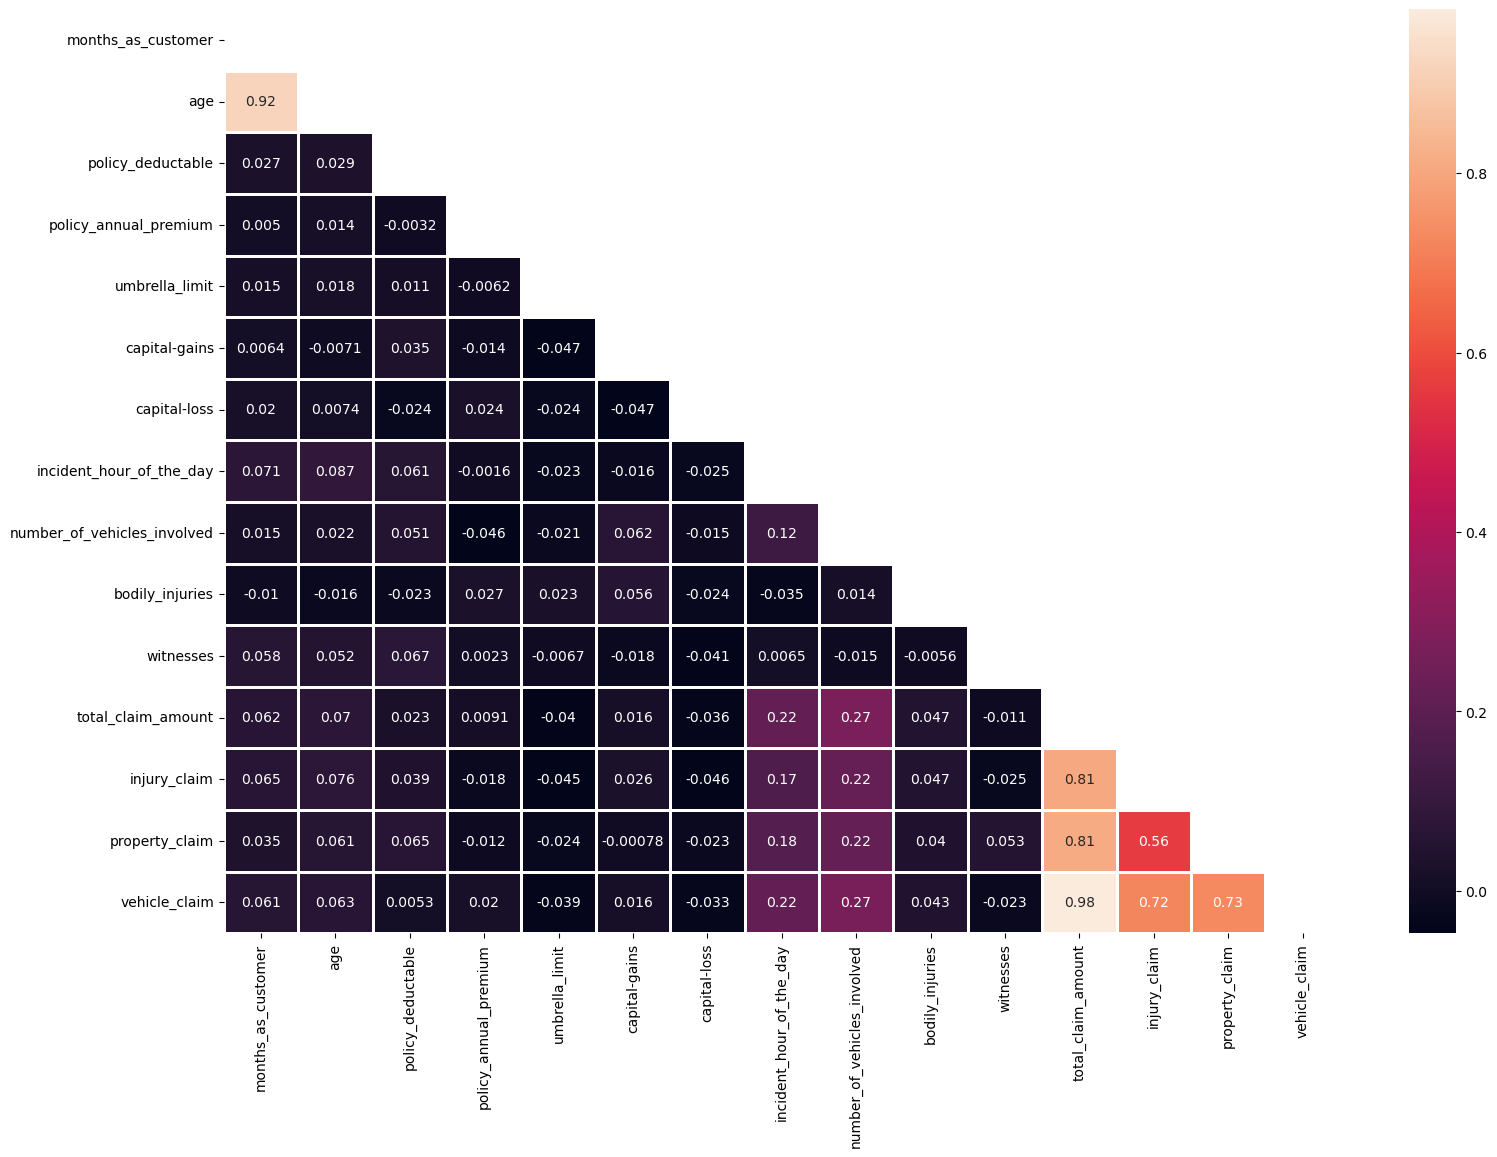

In [102]:
#check for correlation
plt.figure(figsize = (18,12))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(data = corr, mask = mask, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

In [103]:
df.drop(columns = ['age', 'total_claim_amount'], inplace = True, axis = 1)
df.head()

,months_as_customer,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,...,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,53300,...,5,1,YES,1,2,YES,6510,13020,52080,Y
1,228,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,0,...,8,1,NO,0,0,NO,780,780,3510,Y
2,134,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,35100,...,7,3,NO,2,3,NO,7700,3850,23100,N
3,256,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,48900,...,5,1,NO,1,2,NO,6340,6340,50720,Y
4,228,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,66000,...,20,1,NO,0,1,NO,1300,650,4550,N


In [104]:
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

# Splitting Data

In [105]:
x = df.drop('fraud_reported', axis = 1)
y = df['fraud_reported']

In [106]:
#encode categorical data
categorical_df = x.select_dtypes(include = ['object'])
categorical_df.head()

,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available
0,250/500,MALE,MD,craft-repair,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,YES,YES
1,250/500,MALE,MD,machine-op-inspct,other-relative,Vehicle Theft,Rear Collision,Minor Damage,Police,NO,NO
2,100/300,FEMALE,PhD,sales,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NO,NO
3,250/500,FEMALE,PhD,armed-forces,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,NO,NO
4,500/1000,MALE,Associate,sales,unmarried,Vehicle Theft,Rear Collision,Minor Damage,None,NO,NO


In [107]:
for col in categorical_df.columns:
    print(f"{col}: \n{categorical_df[col].unique()}\n")

policy_csl: 
['250/500' '100/300' '500/1000']

insured_sex: 
['MALE' 'FEMALE']

insured_education_level: 
['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']

insured_occupation: 
['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']

insured_relationship: 
['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']

incident_type: 
['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car']

collision_type: 
['Side Collision' 'Rear Collision' 'Front Collision']

incident_severity: 
['Major Damage' 'Minor Damage' 'Total Loss' 'Trivial Damage']

authorities_contacted: 
['Police' 'None' 'Fire' 'Other' 'Ambulance']

property_damage: 
['YES' 'NO']

police_report_available: 
['YES' 'NO']



In [108]:
categorical_df = pd.get_dummies(categorical_df)

In [109]:
categorical_df.head()

,policy_csl_100/300,policy_csl_250/500,policy_csl_500/1000,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,...,incident_severity_Trivial Damage,authorities_contacted_Ambulance,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_NO,property_damage_YES,police_report_available_NO,police_report_available_YES
0,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,1
1,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,1,0,1,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
3,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
4,0,0,1,0,1,1,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0


In [110]:
#select numerical data
num_df = x.select_dtypes(include = ['int64', 'float64'])

In [111]:
num_df.head()

,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
0,328,1000,1406.91,0,53300,0,5,1,1,2,6510,13020,52080
1,228,2000,1197.22,5000000,0,0,8,1,0,0,780,780,3510
2,134,2000,1413.14,5000000,35100,0,7,3,2,3,7700,3850,23100
3,256,2000,1415.74,6000000,48900,-62400,5,1,1,2,6340,6340,50720
4,228,1000,1583.91,6000000,66000,-46000,20,1,0,1,1300,650,4550


In [112]:
#combine categorical data + numerical data
x = pd.concat([num_df, categorical_df], axis = 1)

In [113]:
x.head()

,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,...,incident_severity_Trivial Damage,authorities_contacted_Ambulance,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_NO,property_damage_YES,police_report_available_NO,police_report_available_YES
0,328,1000,1406.91,0,53300,0,5,1,1,2,...,0,0,0,0,0,1,0,1,0,1
1,228,2000,1197.22,5000000,0,0,8,1,0,0,...,0,0,0,0,0,1,1,0,1,0
2,134,2000,1413.14,5000000,35100,0,7,3,2,3,...,0,0,0,0,0,1,1,0,1,0
3,256,2000,1415.74,6000000,48900,-62400,5,1,1,2,...,0,0,0,0,0,1,1,0,1,0
4,228,1000,1583.91,6000000,66000,-46000,20,1,0,1,...,0,0,0,1,0,0,1,0,1,0


In [114]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25)

In [115]:
x_train.columns

Index(['months_as_customer', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'capital-gains', 'capital-loss',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'bodily_injuries', 'witnesses', 'injury_claim', 'property_claim',
       'vehicle_claim', 'policy_csl_100/300', 'policy_csl_250/500',
       'policy_csl_500/1000', 'insured_sex_FEMALE', 'insured_sex_MALE',
       'insured_education_level_Associate', 'insured_education_level_College',
       'insured_education_level_High School', 'insured_education_level_JD',
       'insured_education_level_MD', 'insured_education_level_Masters',
       'insured_education_level_PhD', 'insured_occupation_adm-clerical',
       'insured_occupation_armed-forces', 'insured_occupation_craft-repair',
       'insured_occupation_exec-managerial',
       'insured_occupation_farming-fishing',
       'insured_occupation_handlers-cleaners',
       'insured_occupation_machine-op-inspct',
       'insured_occupation_

In [116]:
num_df = x_train[['months_as_customer', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'capital-gains',
                'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved',
                 'bodily_injuries', 'witnesses', 'injury_claim', 'property_claim', 'vehicle_claim']]

In [117]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(num_df)

In [118]:
scaled_data

array([[ 1.40471062, -1.03002246,  0.07300098, ...,  1.39299971,
         1.3858497 ,  0.60355809],
       [-1.09877896,  1.42241197, -1.17629653, ..., -0.11654627,
        -0.1250821 ,  0.83837547],
       [-0.76730647, -0.21254432, -0.82308225, ..., -1.49858292,
        -0.62941219, -0.39351265],
       ...,
       [ 0.61092124, -0.21254432, -0.25498666, ...,  0.13847239,
        -0.68910841, -0.49827733],
       [ 1.09068406, -0.21254432,  0.64601784, ..., -0.15973492,
         1.17176672,  0.75167367],
       [ 0.25327987, -1.03002246,  0.96445244, ..., -0.0466218 ,
         1.39820064,  0.61439581]])

In [119]:
scaled_num_df = pd.DataFrame(data = scaled_data, columns = num_df.columns, index = x_train.index)
scaled_num_df.head()

,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
555,1.404711,-1.030022,0.073001,-0.494139,-0.917669,0.949081,0.661185,-0.805616,1.254681,-0.424699,1.393000,1.385850,0.603558
354,-1.098779,1.422412,-1.176297,-0.494139,1.094940,-0.229693,-1.501121,1.165713,-1.195868,-1.332175,-0.116546,-0.125082,0.838375
883,-0.767306,-0.212544,-0.823082,-0.494139,-0.917669,0.949081,0.949493,1.165713,-1.195868,1.390254,-1.498583,-0.629412,-0.393513
521,-1.726832,1.422412,-0.470116,-0.494139,0.206395,0.949081,1.526108,-0.805616,0.029407,1.390254,1.796094,1.789314,0.957590
781,-1.159840,-0.212544,0.724096,-0.494139,1.309047,-0.930489,0.084570,-0.805616,-1.195868,1.390254,0.878849,0.871227,0.450282


In [120]:
x_train.drop(columns = scaled_num_df.columns, inplace = True)

In [121]:
x_train = pd.concat([scaled_num_df, x_train], axis = 1)
x_train.head()

,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,...,incident_severity_Trivial Damage,authorities_contacted_Ambulance,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_NO,property_damage_YES,police_report_available_NO,police_report_available_YES
555,1.404711,-1.030022,0.073001,-0.494139,-0.917669,0.949081,0.661185,-0.805616,1.254681,-0.424699,...,0,0,0,0,1,0,0,1,1,0
354,-1.098779,1.422412,-1.176297,-0.494139,1.094940,-0.229693,-1.501121,1.165713,-1.195868,-1.332175,...,0,1,0,0,0,0,0,1,1,0
883,-0.767306,-0.212544,-0.823082,-0.494139,-0.917669,0.949081,0.949493,1.165713,-1.195868,1.390254,...,0,1,0,0,0,0,0,1,1,0
521,-1.726832,1.422412,-0.470116,-0.494139,0.206395,0.949081,1.526108,-0.805616,0.029407,1.390254,...,0,1,0,0,0,0,0,1,1,0
781,-1.159840,-0.212544,0.724096,-0.494139,1.309047,-0.930489,0.084570,-0.805616,-1.195868,1.390254,...,0,1,0,0,0,0,1,0,1,0


# Building Classification Models 

## **1- Decision Tree Classifier**

In [127]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [125]:
DT_Model = DecisionTreeClassifier()
params = {
    'max_depth' : [3,5,7,10],
    'min_samples_leaf' : list(range(2,10)),
    'criterion' : ['gini', 'entropy'],
    'min_samples_split' :list(range(2,10))
}
grid_search = GridSearchCV(DT_Model, params, cv = 5)
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 4}
0.808


In [126]:
dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, min_samples_leaf = 3,
                                min_samples_split = 4)
dt_model.fit(x_train, y_train)
dt_pred = dt_model.predict(x_test)
train_dt_pred = dt_model.predict(x_train)
print("Testing Classification Report DecisionTreeClassifier: ")
print(classification_report(y_test, dt_pred))
print("Trianing Classification Report DecisionTreeClassifier: ")
print(classification_report(y_train, train_dt_pred))

Testing Classification Report DecisionTreeClassifier: 
              precision    recall  f1-score   support

           N       0.84      0.68      0.75       192
           Y       0.35      0.57      0.43        58

    accuracy                           0.65       250
   macro avg       0.59      0.62      0.59       250
weighted avg       0.72      0.65      0.68       250

Trianing Classification Report DecisionTreeClassifier: 
              precision    recall  f1-score   support

           N       0.89      0.89      0.89       561
           Y       0.67      0.67      0.67       189

    accuracy                           0.83       750
   macro avg       0.78      0.78      0.78       750
weighted avg       0.83      0.83      0.83       750



## **2- RandomForestClassifier**

In [148]:
RF_Model = RandomForestClassifier()
params = {
    'max_depth' : [3,5,7,10],
    'criterion' : ['gini', 'entropy'],
    'min_samples_split' :list(range(2,10))
}
grid_search = GridSearchCV(RF_Model, params)
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 6}
0.7986666666666666


In [149]:
RF_Model = RandomForestClassifier(criterion = 'gini', max_depth = 10, min_samples_split = 6)
RF_Model.fit(x_train, y_train)
rf_pred = RF_Model.predict(x_test)
train_rf_pred = RF_Model.predict(x_train)
print("Testing Classification Report RandomForestClassifier: ")
print(classification_report(y_test, rf_pred))
print("Trianing Classification Report RandomForestClassifier: ")
print(classification_report(y_train, train_rf_pred))

Testing Classification Report RandomForestClassifier: 
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       192
           1       0.55      0.62      0.58        58

    accuracy                           0.79       250
   macro avg       0.71      0.73      0.72       250
weighted avg       0.80      0.79      0.80       250

Trianing Classification Report RandomForestClassifier: 
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       561
           1       0.99      0.74      0.84       189

    accuracy                           0.93       750
   macro avg       0.96      0.87      0.90       750
weighted avg       0.94      0.93      0.93       750



## **3- Gradient Boosting Classifier**

In [150]:
from sklearn.ensemble import GradientBoostingClassifier
GB_Model = GradientBoostingClassifier()
params = {
    'max_depth' : [3,5,7,10],
    'min_samples_split' :list(range(2,10))
}
grid_search = GridSearchCV(GB_Model, params)
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'max_depth': 3, 'min_samples_split': 7}
0.7946666666666667


In [151]:
GB_Model = GradientBoostingClassifier(max_depth = 3, min_samples_split = 7)
GB_Model.fit(x_train, y_train)
gb_pred = GB_Model.predict(x_test)
train_gb_pred = GB_Model.predict(x_train)
print("Testing Classification Report GradiantBoostingClassifier: ")
print(classification_report(y_test, gb_pred))
print("Trianing Classification Report GradiantBoostingClassifier: ")
print(classification_report(y_train, train_gb_pred))

Testing Classification Report GradiantBoostingClassifier: 
              precision    recall  f1-score   support

           0       0.90      0.20      0.32       192
           1       0.26      0.93      0.41        58

    accuracy                           0.37       250
   macro avg       0.58      0.56      0.37       250
weighted avg       0.76      0.37      0.34       250

Trianing Classification Report GradiantBoostingClassifier: 
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       561
           1       0.95      0.78      0.86       189

    accuracy                           0.94       750
   macro avg       0.94      0.89      0.91       750
weighted avg       0.94      0.94      0.93       750



## **4- Xgboost Classifier**

In [141]:
y_map = {'Y' :1, 'N':0}
y_train = y_train.map(y_map)

In [142]:
y_test = y_test.map(y_map)

In [144]:
import warnings
warnings.filterwarnings("ignore")

In [146]:
from xgboost import XGBClassifier
xgb_Model = XGBClassifier()
params = {
    'max_depth' : list(range(2,10)),
    'n_estimators' : [10,50,100,130]
}
grid_search = GridSearchCV(xgb_Model, params)
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'max_depth': 2, 'n_estimators': 10}
0.8093333333333333


In [147]:
xgb_Model = XGBClassifier(max_depth = 2, n_estimators = 10)
xgb_Model.fit(x_train, y_train)
xgb_pred = xgb_Model.predict(x_test)
train_xgb_pred = xgb_Model.predict(x_train)
print("Testing Classification Report XGBClassifier: ")
print(classification_report(y_test, xgb_pred))
print("Trianing Classification Report XGBClassifier: ")
print(classification_report(y_train, train_xgb_pred))

Testing Classification Report XGBClassifier: 
              precision    recall  f1-score   support

           0       0.90      0.82      0.86       192
           1       0.55      0.71      0.62        58

    accuracy                           0.80       250
   macro avg       0.72      0.76      0.74       250
weighted avg       0.82      0.80      0.80       250

Trianing Classification Report XGBClassifier: 
              precision    recall  f1-score   support

           0       0.88      0.89      0.89       561
           1       0.67      0.64      0.66       189

    accuracy                           0.83       750
   macro avg       0.78      0.77      0.77       750
weighted avg       0.83      0.83      0.83       750



## **5- Vooting Classsifier**

In [154]:
from sklearn.ensemble import VotingClassifier

classifiers = [('Decision Tree', dt_model), ('Random Forest', RF_Model),
              ('Gradient Boosting', GB_Model), ('XGBOOST', xgb_Model)]

voting_model = VotingClassifier(estimators = classifiers)
voting_model.fit(x_train, y_train)
voting_pred = voting_model.predict(x_test)
train_voting_pred = voting_model.predict(x_train)

print("Testing Classification Report VotingClassifier: ")
print(classification_report(y_test, voting_pred))
print("Trianing Classification Report VotingClassifier: ")
print(classification_report(y_train, train_voting_pred))

Testing Classification Report VotingClassifier: 
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       192
           1       0.49      0.60      0.54        58

    accuracy                           0.76       250
   macro avg       0.68      0.71      0.69       250
weighted avg       0.78      0.76      0.77       250

Trianing Classification Report VotingClassifier: 
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       561
           1       0.95      0.68      0.79       189

    accuracy                           0.91       750
   macro avg       0.92      0.83      0.87       750
weighted avg       0.91      0.91      0.90       750

